# K-Truss

"The output matrix C is the k-truss subgraph of A.  Its edges are a subset of
A.  Each edge in C is part of at least k-2 triangles in C.  The pattern of C
is the adjacency matrix of the k-truss subgraph of A.  The edge weights of C
are the support of each edge.  That is, C(i,j)=nt if the edge (i,j) is part
of nt triangles in C.  All edges in C have support of at least k-2.  The
total number of triangles in C is sum(C)/6.  The number of edges in C is
nnz(C)/2.  C is returned as symmetric with a zero-free diagonal." - LAGraph_ktruss()

In [4]:
from pygraphblas import *
from pygraphblas.demo.gviz import draw

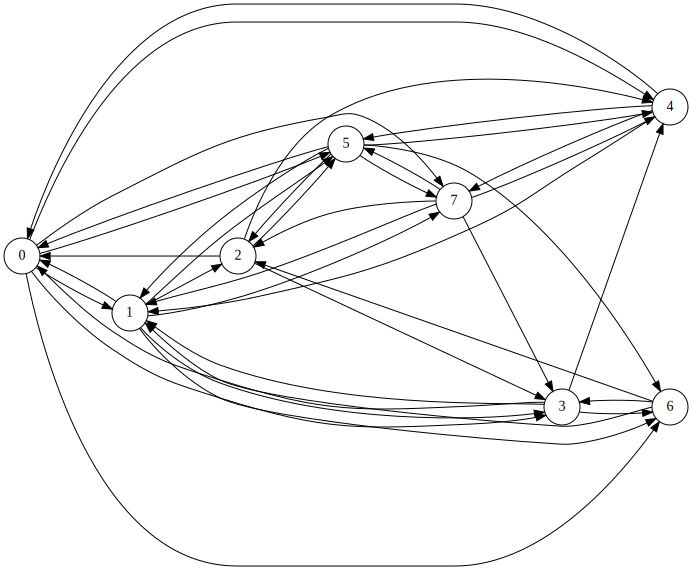

In [8]:
def ktruss(A, k=3):
    assert k >= 3
    Support = Scalar.from_value(k-2)
    last_nz = A.nvals
    while True:
        A = A.mxm(A, semiring=plus_land, mask=A)
        A = A.select(lib.GxB_GE_THUNK, Support)
        if A.nvals == last_nz:
            break
        last_nz = A.nvals
    return A

A = Matrix.from_random(UINT32, 8, 8, 68, make_pattern=True, no_diagonal=True, seed=42)
draw(A, show_weight=False)

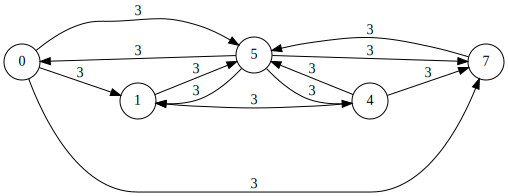

In [7]:
draw(ktruss(A, 4).select('>', 2))